In [123]:
import os 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
path = os.path.abspath('')
files = ['Default_settings.csv','Inertia.csv','personal_confidence.csv', 'swarm_size.csv']
dic = {}
for file in files:
    tmp_df = pd.read_csv(os.path.join(path,file),header=6)
    tmp_df['found-optimum'] = tmp_df['iterations'] != 300    
    dic[file] = tmp_df.drop(['trails-mode','path-to-load','highlight-mode','path-to-save','[run number]','[step]'],axis=1)

In [148]:
def group(tmp_df,on):
    '''
    replaces column iteration with average iterations
    average meaning the average iterations using one setting, only using results which found the optimum
    
    Sums up the number the optimum was found
    tmp_df = dataFrame to average
    on = column to average 
    '''
    join_df = tmp_df.copy()[tmp_df['found-optimum']].groupby(on).agg({'iterations': ['mean','std']})
    join_df.columns = join_df.columns.droplevel()
    final_df =  tmp_df.drop(['iterations'], axis=1).join(join_df,on=on).groupby(on).agg(
        {'mean': 'mean',
         'std': 'mean',
         'found-optimum' : 'sum'
        }).rename(columns = {'mean' : 'iterations_avg','std' : 'iterations_std'}).reset_index()
    runs = tmp_df.shape[0]/final_df.shape[0]
    final_df.loc[:,'found-optimum'] = final_df['found-optimum'] / runs
    
    return final_df

#### How many times did we find the optimum

particle-inertia


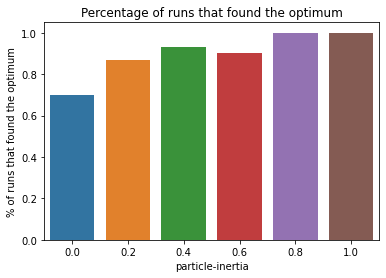

personal-confidence


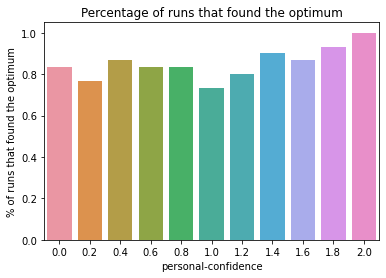

population-size


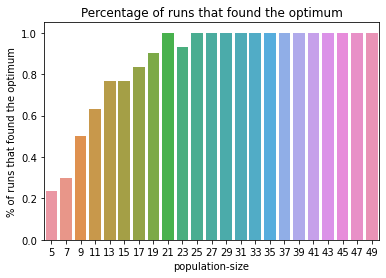

In [150]:
parameters = ['particle-inertia','personal-confidence','population-size']
for i,file in enumerate(files[1:]):
    df = dic[file]
    df = group(df,on=parameters[i])
    print(parameters[i])
    sns.barplot(data=df,y='found-optimum',x=parameters[i])
    plt.title('Percentage of runs that found the optimum')
    plt.ylabel('% of runs that found the optimum')
    plt.show()

#### Personal Confindence


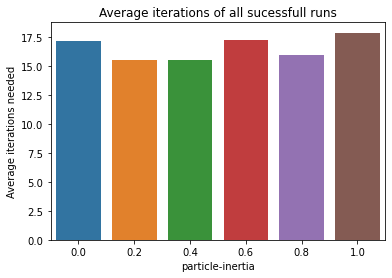

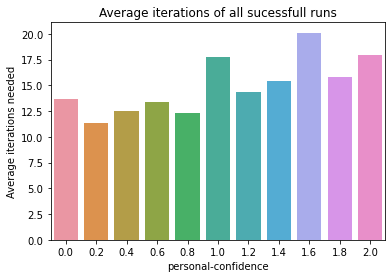

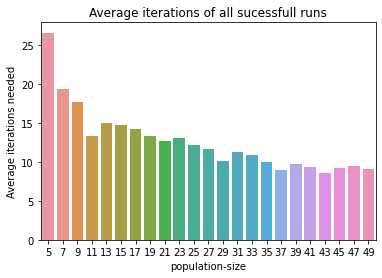

In [163]:
parameters = ['particle-inertia','personal-confidence','population-size']
for i,file in enumerate(files[1:]):
    df = dic[file]
    df = group(df,on=parameters[i])
    sns.barplot(data=df,y='iterations_avg',x=parameters[i])
    #for error bars add yerr=df['iterations_std'] in sns.barplot
    plt.title('Average iterations of all sucessfull runs')
    plt.ylabel('Average iterations needed')
    plt.show()